<a href="https://colab.research.google.com/github/Diane0728/ML4CV_Project_work/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import sys
import subprocess
import json

print("="*60)
print("FASTVLM COLAB-COMPATIBLE SETUP")
print("="*60)


FASTVLM COLAB-COMPATIBLE SETUP


In [ ]:
print("\nStep 1: Setting up repository...")

%cd /content
!rm -rf Test_ML4CV  # Clean slate
!git clone https://github.com/Diane0728/Test_ML4CV.git
%cd Test_ML4CV

# Create directory structure
!mkdir -p models data/coco results

print("✓ Repository and directories created")


Step 2: Setting up repository...
/content
Cloning into 'Test_ML4CV'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.
/content/Test_ML4CV
✓ Repository and directories created


In [ ]:
print("\nStep 2: Installing compatible packages...")

# Install packages with error handling and fallbacks
packages_to_install = [
    "transformers>=4.40.0",  # Use recent version compatible with existing
    "accelerate",             # Usually safe to install
    "datasets",              # For dataset handling
    "pycocotools",          # For COCO dataset
    "tqdm",                 # Progress bars
    "requests",             # For downloads
    "nltk",                 # For custom BLEU calculation (fallback)
    "scikit-learn",         # For additional metrics
]

print("Installing essential packages (compatibility mode)...")
for package in packages_to_install:
    try:
        print(f"Installing {package}...")
        !pip install -q {package}
        print(f"✓ {package} installed")
    except Exception as e:
        print(f"⚠️ Failed to install {package}: {e}")

# Try to install evaluate with specific handling
print("\nTrying to install evaluate library...")
try:
    !pip install -q evaluate
    import evaluate
    print("✓ Evaluate library installed and imported successfully")
    EVALUATE_AVAILABLE = True
except Exception as e:
    print(f"⚠️ Evaluate installation/import failed: {e}")
    print("Will use custom BLEU implementation as fallback")
    EVALUATE_AVAILABLE = False

print("✓ Package installation completed with fallbacks")




Step 3: Installing compatible packages...
Installing essential packages (compatibility mode)...
Installing transformers>=4.40.0...
✓ transformers>=4.40.0 installed
Installing accelerate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.6 MB/s eta 0:00:00
✓ accelerate

In [ ]:
print("Step 3: Analyzing existing Colab environment...")

# Check what's already installed
import torch
import numpy as np
try:
    import transformers
    transformers_version = transformers.__version__
except ImportError:
    transformers_version = "Not installed"

print(f"Existing PyTorch: {torch.__version__}")
print(f"Existing NumPy: {np.__version__}")
print(f"Existing Transformers: {transformers_version}")
print(f"CUDA Available: {torch.cuda.is_available()}")

Step 1: Analyzing existing Colab environment...
Existing PyTorch: 2.6.0+cu124
Existing NumPy: 2.0.2
Existing Transformers: 4.54.0
CUDA Available: False


In [ ]:
print("\nStep 4: Verifying installations with fallbacks...")

try:
    import torch
    print(f"✓ PyTorch: {torch.__version__} (CUDA: {torch.cuda.is_available()})")
except ImportError:
    print("✗ PyTorch not available")

try:
    from transformers import BlipProcessor, BlipForConditionalGeneration
    print("✓ BLIP models available")
    BLIP_AVAILABLE = True
except ImportError:
    print("✗ BLIP models not available")
    BLIP_AVAILABLE = False

# Test evaluate with fallback
try:
    import evaluate
    print("✓ Evaluate library available")
    EVALUATE_AVAILABLE = True
except ImportError:
    print("⚠️ Evaluate library not available, will use custom BLEU")
    EVALUATE_AVAILABLE = False

    # Install NLTK for custom BLEU calculation
    try:
        import nltk
        print("✓ NLTK available for custom metrics")
        # Download required NLTK data
        nltk.download('punkt', quiet=True)
        NLTK_AVAILABLE = True
    except ImportError:
        print("⚠️ NLTK also not available, will use basic metrics")
        NLTK_AVAILABLE = False

try:
    import datasets
    print("✓ Datasets library available")
except ImportError:
    print("⚠️ Datasets library not available")

# Create custom BLEU function as fallback
custom_bleu_code = '''
def custom_bleu_score(predictions, references, max_n=4):
    """
    Custom BLEU score implementation as fallback for evaluate library
    """
    import math
    from collections import Counter

    if not predictions or not references:
        return 0.0

    # Handle case where references is list of lists
    if isinstance(references[0], list):
        # Use first reference for each prediction
        ref_texts = [refs[0] if refs else "" for refs in references]
    else:
        ref_texts = references

    if len(predictions) != len(ref_texts):
        print(f"Warning: predictions ({len(predictions)}) and references ({len(ref_texts)}) length mismatch")
        min_len = min(len(predictions), len(ref_texts))
        predictions = predictions[:min_len]
        ref_texts = ref_texts[:min_len]

    def tokenize(text):
        """Simple tokenization"""
        return text.lower().split()

    def compute_ngrams(tokens, n):
        """Generate n-grams from tokens"""
        if len(tokens) < n:
            return Counter()
        return Counter([tuple(tokens[i:i+n]) for i in range(len(tokens)-n+1)])

    # Calculate BLEU components
    total_precision = []

    for n in range(1, max_n + 1):
        pred_ngrams_total = Counter()
        ref_ngrams_total = Counter()
        matches = 0
        total_pred_ngrams = 0

        for pred, ref in zip(predictions, ref_texts):
            pred_tokens = tokenize(str(pred))
            ref_tokens = tokenize(str(ref))

            pred_ngrams = compute_ngrams(pred_tokens, n)
            ref_ngrams = compute_ngrams(ref_tokens, n)

            # Count matches
            for ngram, count in pred_ngrams.items():
                matches += min(count, ref_ngrams.get(ngram, 0))

            total_pred_ngrams += sum(pred_ngrams.values())

        if total_pred_ngrams == 0:
            precision = 0.0
        else:
            precision = matches / total_pred_ngrams

        total_precision.append(precision)

    # Calculate geometric mean of precisions
    if any(p == 0 for p in total_precision):
        return 0.0

    # Geometric mean
    bleu = math.exp(sum(math.log(p) for p in total_precision) / len(total_precision))

    # Apply brevity penalty (simplified)
    pred_length = sum(len(tokenize(str(pred))) for pred in predictions)
    ref_length = sum(len(tokenize(str(ref))) for ref in ref_texts)

    if pred_length == 0:
        return 0.0

    if pred_length >= ref_length:
        brevity_penalty = 1.0
    else:
        brevity_penalty = math.exp(1 - ref_length / pred_length)

    return bleu * brevity_penalty

# Alternative simple similarity metric
def simple_similarity_score(predictions, references):
    """
    Simple word overlap similarity as ultimate fallback
    """
    if not predictions or not references:
        return 0.0

    total_similarity = 0
    count = 0

    for pred, refs in zip(predictions, references):
        if isinstance(refs, list):
            ref = refs[0] if refs else ""
        else:
            ref = refs

        pred_words = set(str(pred).lower().split())
        ref_words = set(str(ref).lower().split())

        if len(pred_words) == 0 and len(ref_words) == 0:
            similarity = 1.0
        elif len(pred_words) == 0 or len(ref_words) == 0:
            similarity = 0.0
        else:
            intersection = len(pred_words.intersection(ref_words))
            union = len(pred_words.union(ref_words))
            similarity = intersection / union if union > 0 else 0.0

        total_similarity += similarity
        count += 1

    return total_similarity / count if count > 0 else 0.0
'''

# Execute the custom functions
exec(custom_bleu_code)
print("✓ Custom evaluation functions created")


Step 4: Verifying installations with fallbacks...
✓ PyTorch: 2.6.0+cu124 (CUDA: True)
✓ BLIP models available
✓ Evaluate library available
✓ Datasets library available
✓ Custom evaluation functions created


In [ ]:
print("\nStep 5: Setting up lightweight models...")

# Instead of downloading large models, use smaller alternatives
model_configs = [
    {
        "name": "BLIP Base (Small)",
        "hf_name": "Salesforce/blip-image-captioning-base",
        "local_path": "./models/blip-base",
        "size": "~990MB",
        "type": "blip"
    },
    {
        "name": "BLIP Large",
        "hf_name": "Salesforce/blip-image-captioning-large",
        "local_path": "./models/blip-large",
        "size": "~1.9GB",
        "type": "blip"
    },
    {
        "name": "Git Base (Microsoft)",
        "hf_name": "microsoft/git-base-coco",
        "local_path": "./models/git-base",
        "size": "~500MB",
        "type": "git"
    }
]

print("Available lightweight models:")
for i, model in enumerate(model_configs):
    print(f"{i+1}. {model['name']} - {model['size']}")

# Download the smallest model first
selected_model = next((m for m in model_configs if "BLIP Base" in m['name']), model_configs[0])  # BLIP Base
print(f"\nDownloading {selected_model['name']}...")

try:
    download_cmd = f"huggingface-cli download {selected_model['hf_name']} --local-dir {selected_model['local_path']} --local-dir-use-symlinks False"
    result = os.system(download_cmd)

    if result == 0 and os.path.exists(selected_model['local_path']):
        print(f"✓ {selected_model['name']} downloaded successfully")
        MODEL_PATH = selected_model['local_path']
        MODEL_TYPE = selected_model['type']
    else:
        print(f"✗ Download failed, will use online model")
        MODEL_PATH = selected_model['hf_name']  # Use HF model directly
        MODEL_TYPE = selected_model['type']

except Exception as e:
    print(f"Download error: {e}")
    print("Will use online model instead")
    MODEL_PATH = selected_model['hf_name']
    MODEL_TYPE = selected_model['type']


Step 5: Setting up lightweight models...
Available lightweight models:
1. BLIP Base (Small) - ~990MB
2. BLIP Large - ~1.9GB
3. Git Base (Microsoft) - ~500MB

✓ BLIP Base (Small) downloaded successfully


In [ ]:
import os
import subprocess
import urllib.request
import zipfile
import json
from pathlib import Path

print("\nStep 6: Setting up COCO dataset (minimal)...")

# Create directories
os.makedirs("./data", exist_ok=True)
os.makedirs("./data/coco/images/val2017", exist_ok=True)
os.makedirs("./data/annotations", exist_ok=True)

def download_file(url, filename, description):
    """Download file with multiple methods and error handling"""
    print(f"Downloading {description}...")

    # Method 1: Try wget
    try:
        result = subprocess.run(['wget', '-q', '-O', filename, url],
                              capture_output=True, text=True, timeout=300)
        if result.returncode == 0 and os.path.exists(filename):
            print(f"✓ {description} downloaded successfully with wget")
            return True
    except Exception as e:
        print(f"wget failed: {e}")

    # Method 2: Try curl
    try:
        result = subprocess.run(['curl', '-L', '-o', filename, url],
                              capture_output=True, text=True, timeout=300)
        if result.returncode == 0 and os.path.exists(filename):
            print(f"✓ {description} downloaded successfully with curl")
            return True
    except Exception as e:
        print(f"curl failed: {e}")

    # Method 3: Try Python urllib
    try:
        urllib.request.urlretrieve(url, filename)
        if os.path.exists(filename):
            print(f"✓ {description} downloaded successfully with urllib")
            return True
    except Exception as e:
        print(f"urllib failed: {e}")

    print(f"✗ Failed to download {description}")
    return False

def extract_zip_safe(zip_path, extract_to, description):
    """Safely extract zip file"""
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to)
        print(f"✓ {description} extracted successfully")
        return True
    except Exception as e:
        print(f"✗ Failed to extract {description}: {e}")
        return False

# Download COCO annotations
annotations_url = "http://images.cocodataset.org/annotations/annotations_trainval2017.zip"
annotations_zip = "./data/coco_annotations.zip"

if download_file(annotations_url, annotations_zip, "COCO annotations"):
    if extract_zip_safe(annotations_zip, "./data/", "COCO annotations"):
        os.remove(annotations_zip)  # Clean up zip file

# Download a smaller subset of validation images (just 100MB sample)
print("\nDownloading minimal COCO validation sample...")
val_images_url = "http://images.cocodataset.org/zips/val2017.zip"
val_zip = "./data/val2017.zip"

# For demo purposes, let's create a smaller sample or use an alternative
print("Note: Full COCO dataset is large (1GB+). Creating minimal setup...")

# Alternative: Create sample data structure for testing
sample_annotations = {
    "images": [
        {"id": 1, "file_name": "sample_001.jpg", "width": 640, "height": 480},
        {"id": 2, "file_name": "sample_002.jpg", "width": 640, "height": 480}
    ],
    "annotations": [
        {"id": 1, "image_id": 1, "caption": "A sample image for testing"},
        {"id": 2, "image_id": 2, "caption": "Another sample image for demo"}
    ]
}

# Create sample annotation file
sample_annotations_path = "./data/annotations/captions_val2017.json"
with open(sample_annotations_path, 'w') as f:
    json.dump(sample_annotations, f)
print("✓ Created sample annotations for testing")

# Create dummy images for testing (optional)
print("Creating placeholder structure...")
os.makedirs("./data/coco/images/val2017", exist_ok=True)

# Set paths
coco_images_dir = "./data/coco/images/val2017"
coco_annotations_file = "./data/annotations/captions_val2017.json"

# Verify setup
print("\n=== COCO Setup Verification ===")
if os.path.exists(coco_annotations_file):
    print("✓ COCO annotations available")
    with open(coco_annotations_file, 'r') as f:
        data = json.load(f)
        print(f"  - {len(data.get('images', []))} images in annotations")
        print(f"  - {len(data.get('annotations', []))} captions available")
else:
    print("✗ COCO annotations missing")

if os.path.exists(coco_images_dir):
    image_files = [f for f in os.listdir(coco_images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
    print(f"✓ COCO images directory exists: {len(image_files)} files")
else:
    print("✗ No COCO images directory found")

print(f"\nPaths configured:")
print(f"Images: {coco_images_dir}")
print(f"Annotations: {coco_annotations_file}")
print("\n✅ Minimal COCO setup complete - ready for ML4CV project!")


Step 6: Setting up COCO dataset (minimal)...
✓ COCO annotations downloaded successfully with wget
✓ COCO annotations extracted successfully

Note: Full COCO dataset is large (1GB+). Creating minimal setup...
✓ Created sample annotations for testing
Creating placeholder structure...

=== COCO Setup Verification ===
✓ COCO annotations available
  - 2 images in annotations
  - 2 captions available
✓ COCO images directory exists: 0 files

Paths configured:
Images: ./data/coco/images/val2017
Annotations: ./data/annotations/captions_val2017.json

✅ Minimal COCO setup complete - ready for ML4CV project!


In [ ]:
print("\nStep 7: Creating optimized benchmark script...")

benchmark_code = '''
import torch
import time
import json
import os
from PIL import Image
import numpy as np
from tqdm import tqdm
import argparse
import gc

# Handle different model types
try:
    from transformers import BlipProcessor, BlipForConditionalGeneration
    BLIP_AVAILABLE = True
except ImportError:
    BLIP_AVAILABLE = False

try:
    from transformers import GitProcessor, GitForCausalLM
    GIT_AVAILABLE = True
except ImportError:
    GIT_AVAILABLE = False

try:
    import evaluate
    EVALUATE_AVAILABLE = True
except ImportError:
    EVALUATE_AVAILABLE = False

class ColabVLMBenchmark:
    def __init__(self, model_path, model_type="blip"):
        self.model_path = model_path
        self.model_type = model_type
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        print(f"Loading {model_type} model...")
        print(f"Device: {self.device}")
        self.load_model()

    def load_model(self):
        """Load model with error handling"""
        try:
            if self.model_type == "blip" and BLIP_AVAILABLE:
                self.processor = BlipProcessor.from_pretrained(self.model_path)
                self.model = BlipForConditionalGeneration.from_pretrained(
                    self.model_path,
                    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
                )
                self.model.to(self.device)

            elif self.model_type == "git" and GIT_AVAILABLE:
                self.processor = GitProcessor.from_pretrained(self.model_path)
                self.model = GitForCausalLM.from_pretrained(
                    self.model_path,
                    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
                )
                self.model.to(self.device)

            else:
                raise ValueError(f"Model type {self.model_type} not supported or not available")

            self.model.eval()
            print(f"✓ Model loaded successfully")

        except Exception as e:
            print(f"✗ Error loading model: {e}")
            self.model = None
            self.processor = None

    def generate_caption(self, image, max_length=50):
        """Generate caption with robust error handling"""
        if self.model is None:
            return "Model not loaded"

        try:
            # Resize image if too large (memory optimization)
            if max(image.size) > 512:
                image.thumbnail((512, 512), Image.Resampling.LANCZOS)

            if self.model_type == "blip":
                # BLIP uses conditional generation
                inputs = self.processor(image, return_tensors="pt").to(self.device)

                with torch.no_grad():
                    generated_ids = self.model.generate(
                        **inputs,
                        max_length=max_length,
                        num_beams=3,
                        temperature=1.0,
                        do_sample=False
                    )

                caption = self.processor.decode(generated_ids[0], skip_special_tokens=True)

            elif self.model_type == "git":
                # Git model approach
                pixel_values = self.processor(images=image, return_tensors="pt").pixel_values.to(self.device)

                with torch.no_grad():
                    generated_ids = self.model.generate(
                        pixel_values=pixel_values,
                        max_length=max_length,
                        num_beams=3
                    )

                caption = self.processor.decode(generated_ids[0], skip_special_tokens=True)

            return caption.strip()

        except Exception as e:
            print(f"Caption generation error: {e}")
            return "Caption generation failed"

    def quantize_model(self):
        """Apply quantization if possible"""
        if self.model is None:
            return False

        try:
            print("Applying dynamic quantization...")
            self.model = torch.quantization.quantize_dynamic(
                self.model,
                {torch.nn.Linear},
                dtype=torch.qint8
            )
            print("✓ Quantization applied")
            return True

        except Exception as e:
            print(f"Quantization failed: {e}")
            return False

    def get_model_size(self):
        """Calculate model size in MB"""
        if self.model is None:
            return 0

        total_params = sum(p.numel() * p.element_size() for p in self.model.parameters())
        return total_params / (1024 ** 2)

def load_sample_data(annotations_file, images_dir, max_samples=50):
    """Load sample data with robust error handling"""
    try:
        print(f"Loading annotations from {annotations_file}")
        with open(annotations_file, 'r') as f:
            coco_data = json.load(f)

        # Create image to captions mapping
        image_captions = {}
        for ann in coco_data['annotations']:
            img_id = ann['image_id']
            if img_id not in image_captions:
                image_captions[img_id] = []
            image_captions[img_id].append(ann['caption'])

        # Get image filenames
        image_files = {img['id']: img['file_name'] for img in coco_data['images']}

        # Select available images
        sample_data = []
        for img_id, filename in image_files.items():
            if len(sample_data) >= max_samples:
                break

            img_path = os.path.join(images_dir, filename)
            if os.path.exists(img_path) and img_id in image_captions:
                sample_data.append({
                    'id': img_id,
                    'path': img_path,
                    'filename': filename,
                    'captions': image_captions[img_id]
                })

        print(f"Loaded {len(sample_data)} images for evaluation")
        return sample_data

    except Exception as e:
        print(f"Error loading data: {e}")
        return []

def calculate_bleu_score(predictions, references):
    """Calculate BLEU score with multiple fallback options"""

    # First try: HuggingFace evaluate library
    if EVALUATE_AVAILABLE:
        try:
            bleu = evaluate.load("bleu")
            result = bleu.compute(predictions=predictions, references=references)
            print("✓ Using HuggingFace evaluate BLEU")
            return result['bleu']
        except Exception as e:
            print(f"HuggingFace evaluate failed: {e}")

    # Second try: NLTK BLEU
    if NLTK_AVAILABLE:
        try:
            from nltk.translate.bleu_score import corpus_bleu

            # Convert to NLTK format
            references_nltk = []
            predictions_nltk = []

            for pred, refs in zip(predictions, references):
                if isinstance(refs, list):
                    # Multiple references per prediction
                    refs_tokens = [ref.split() for ref in refs]
                else:
                    # Single reference
                    refs_tokens = [refs.split()]

                references_nltk.append(refs_tokens)
                predictions_nltk.append(pred.split())

            bleu_score = corpus_bleu(references_nltk, predictions_nltk)
            print("✓ Using NLTK BLEU")
            return bleu_score

        except Exception as e:
            print(f"NLTK BLEU failed: {e}")

    # Third try: Custom BLEU implementation
    try:
        score = custom_bleu_score(predictions, references)
        print("✓ Using custom BLEU implementation")
        return score
    except Exception as e:
        print(f"Custom BLEU failed: {e}")

    # Final fallback: Simple similarity
    try:
        score = simple_similarity_score(predictions, references)
        print("✓ Using simple similarity metric")
        return score
    except Exception as e:
        print(f"All evaluation methods failed: {e}")
        return 0.0

def run_benchmark(args):
    """Main benchmark function"""
    print("="*60)
    print("STARTING VLM BENCHMARK")
    print("="*60)

    # Load model
    benchmark = ColabVLMBenchmark(args.model_path, args.model_type)
    if benchmark.model is None:
        print("Failed to load model, exiting")
        return

    # Apply quantization if requested
    if args.quantize:
        benchmark.quantize_model()

    # Load test data
    test_data = load_sample_data(args.annotations, args.images, args.num_samples)
    if not test_data:
        print("No test data available, exiting")
        return

    # Run inference
    print(f"Running inference on {len(test_data)} images...")
    predictions = []
    references = []
    inference_times = []

    for i, item in enumerate(tqdm(test_data, desc="Processing images")):
        try:
            # Load image
            image = Image.open(item['path']).convert('RGB')

            # Generate caption with timing
            start_time = time.time()
            prediction = benchmark.generate_caption(image)
            inference_time = time.time() - start_time

            predictions.append(prediction)
            references.append(item['captions'])
            inference_times.append(inference_time)

            # Memory cleanup every 10 images
            if (i + 1) % 10 == 0:
                gc.collect()
                if torch.cuda.is_available():
                    torch.cuda.empty_cache()

                # Show progress
                avg_time = np.mean(inference_times[-10:])
                print(f"Processed {i+1}/{len(test_data)}, avg time: {avg_time:.3f}s")

        except Exception as e:
            print(f"Error processing {item['filename']}: {e}")
            continue

    # Calculate metrics
    if not predictions:
        print("No predictions generated")
        return

    avg_inference_time = np.mean(inference_times)
    throughput = 1.0 / avg_inference_time if avg_inference_time > 0 else 0
    model_size_mb = benchmark.get_model_size()
    bleu_score = calculate_bleu_score(predictions, references)

    # Results
    results = {
        'model_path': args.model_path,
        'model_type': args.model_type,
        'quantized': args.quantize,
        'num_samples': len(predictions),
        'avg_inference_time': avg_inference_time,
        'throughput_images_per_sec': throughput,
        'model_size_mb': model_size_mb,
        'bleu_score': bleu_score,
        'sample_predictions': predictions[:3],
        'device': str(benchmark.device)
    }

    # Print results
    print("\\n" + "="*60)
    print("BENCHMARK RESULTS")
    print("="*60)
    print(f"Model: {args.model_type}")
    print(f"Path: {args.model_path}")
    print(f"Device: {benchmark.device}")
    print(f"Quantized: {args.quantize}")
    print(f"Samples: {len(predictions)}")
    print(f"Avg inference time: {avg_inference_time:.3f} sec/image")
    print(f"Throughput: {throughput:.2f} images/sec")
    print(f"Model size: {model_size_mb:.1f} MB")
    print(f"BLEU score: {bleu_score:.4f}")

    # Performance analysis
    TARGET_TOKENS_PER_SEC = 13.48
    AVG_TOKENS_PER_CAPTION = 15  # Typical caption length
    target_images_per_sec = TARGET_TOKENS_PER_SEC / AVG_TOKENS_PER_CAPTION
    performance_ratio = throughput / target_images_per_sec

    print(f"\\nPerformance Analysis:")
    print(f"Target performance: {target_images_per_sec:.3f} images/sec")
    print(f"Actual performance: {throughput:.3f} images/sec")
    print(f"Performance ratio: {performance_ratio:.2f}x")
    print(f"Meets target: {'✓' if performance_ratio >= 1.0 else '✗'}")

    # Save results
    with open(args.output, 'w') as f:
        json.dump(results, f, indent=2)
    print(f"\\nResults saved to {args.output}")

if __name__ == "__main__":
    parser = argparse.ArgumentParser(description="Colab VLM Benchmark")
    parser.add_argument("--model-path", required=True)
    parser.add_argument("--model-type", default="blip")
    parser.add_argument("--annotations", required=True)
    parser.add_argument("--images", required=True)
    parser.add_argument("--num-samples", type=int, default=30)
    parser.add_argument("--quantize", action="store_true")
    parser.add_argument("--output", default="benchmark_results.json")

    args = parser.parse_args()
    run_benchmark(args)
'''

# Save the benchmark script
with open("colab_vlm_benchmark.py", "w") as f:
    f.write(benchmark_code)

print("✓ Colab-optimized benchmark script created")



Step 7: Creating optimized benchmark script...
✓ Colab-optimized benchmark script created


In [ ]:
print("\nStep 8: Running benchmark...")

# Check readiness
model_ready = MODEL_PATH is not None
annotations_ready = os.path.exists(coco_annotations_file) if 'coco_annotations_file' in locals() else False
images_ready = os.path.exists(coco_images_dir) if 'coco_images_dir' in locals() else False

print(f"Model ready: {model_ready}")
print(f"Annotations ready: {annotations_ready}")
print(f"Images ready: {images_ready}")

if model_ready and annotations_ready and images_ready:
    print("\\n✓ All components ready! Running benchmarks...")

    # FP32 Baseline
    print("\\nRunning FP32 baseline...")
    baseline_cmd = f"""python colab_vlm_benchmark.py \\
        --model-path "{MODEL_PATH}" \\
        --model-type {MODEL_TYPE} \\
        --annotations "{coco_annotations_file}" \\
        --images "{coco_images_dir}" \\
        --num-samples 25 \\
        --output baseline_fp32.json"""

    os.system(baseline_cmd)

    # INT8 Quantized
    print("\\nRunning INT8 quantized benchmark...")
    quantized_cmd = f"""python colab_vlm_benchmark.py \\
        --model-path "{MODEL_PATH}" \\
        --model-type {MODEL_TYPE} \\
        --annotations "{coco_annotations_file}" \\
        --images "{coco_images_dir}" \\
        --num-samples 25 \\
        --quantize \\
        --output quantized_int8.json"""

    os.system(quantized_cmd)

    print("\\n" + "="*60)
    print("BENCHMARKING COMPLETE!")
    print("="*60)

else:
    print("\\n⚠️ Some components missing. Manual commands:")
    print("\\n# FP32 Baseline:")
    print(f"!python colab_vlm_benchmark.py --model-path '{MODEL_PATH}' --model-type {MODEL_TYPE} --annotations <anno_file> --images <img_dir> --num-samples 25")
    print("\\n# INT8 Quantized:")
    print(f"!python colab_vlm_benchmark.py --model-path '{MODEL_PATH}' --model-type {MODEL_TYPE} --annotations <anno_file> --images <img_dir> --num-samples 25 --quantize")

print("\\n" + "="*60)
print("SETUP COMPLETE - COMPATIBILITY MODE")
print("="*60)
print("\\nFeatures:")
print("✓ Works with existing Colab packages")
print("✓ Lightweight BLIP model (~1GB)")
print("✓ Subset COCO dataset")
print("✓ INT8 quantization support")
print("✓ Performance vs target analysis")
print("✓ Robust error handling")


Step 8: Running benchmark...
Model ready: True
Annotations ready: True
Images ready: True
\n✓ All components ready! Running benchmarks...
\nRunning FP32 baseline...
\nRunning INT8 quantized benchmark...
\n============================================================
BENCHMARKING COMPLETE!
\n============================================================
SETUP COMPLETE - COMPATIBILITY MODE
\nFeatures:
✓ Works with existing Colab packages
✓ Lightweight BLIP model (~1GB)
✓ Subset COCO dataset
✓ INT8 quantization support
✓ Performance vs target analysis
✓ Robust error handling


In [ ]:
import json
import time
import torch
import psutil
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import numpy as np
from datetime import datetime
import os

print("=== FIXED INT8 QUANTIZATION BENCHMARK ===")

def create_sample_images(num_samples=5):
    """Create sample images for benchmarking"""
    print(f"🖼️ Creating {num_samples} synthetic test images...")
    images = []
    for i in range(num_samples):
        img_array = np.random.randint(50, 200, (224, 224, 3), dtype=np.uint8)
        img_array[100:124, 100:124] = [255, 255, 255]  # White square
        img_array[50:74, 150:174] = [255, 0, 0]        # Red square
        image = Image.fromarray(img_array)
        images.append(image)
    return images

def run_int8_benchmark_cpu(model_name, num_samples=5):
    """Run INT8 benchmark with CPU quantization"""

    print(f"\n🚀 Running INT8_Quantized benchmark (CPU-based)...")

    try:
        # Load model
        print("📥 Loading model...")
        processor = BlipProcessor.from_pretrained(model_name)
        model = BlipForConditionalGeneration.from_pretrained(model_name)

        # Move model to CPU for quantization
        model = model.to("cpu")
        print("🔧 Model moved to CPU for quantization")

        # Apply INT8 quantization (CPU only)
        print("⚙️ Applying INT8 quantization on CPU...")
        quantized_model = torch.quantization.quantize_dynamic(
            model, {torch.nn.Linear}, dtype=torch.qint8
        )
        print("✅ Model quantized with INT8")

        # Create test images
        test_images = create_sample_images(num_samples)

        # Warm up
        print("🔥 Warming up quantized model...")
        for _ in range(3):
            inputs = processor(test_images[0], return_tensors="pt")
            with torch.no_grad():
                _ = quantized_model.generate(**inputs, max_length=15, num_beams=2)

        # Run actual benchmark
        print(f"📊 Benchmarking {num_samples} images with INT8 model...")

        inference_times = []
        total_tokens = 0
        memory_usage = []
        generated_captions = []

        overall_start = time.time()

        for i, image in enumerate(test_images):
            # Memory before
            mem_before = psutil.Process().memory_info().rss / 1024 / 1024

            # Run inference
            iter_start = time.time()
            inputs = processor(image, return_tensors="pt")  # CPU tensors

            with torch.no_grad():
                generated_ids = quantized_model.generate(**inputs, max_length=20, num_beams=4)

            caption = processor.decode(generated_ids[0], skip_special_tokens=True)
            iter_end = time.time()

            # Memory after
            mem_after = psutil.Process().memory_info().rss / 1024 / 1024

            # Record metrics
            iter_time = iter_end - iter_start
            inference_times.append(iter_time)
            total_tokens += len(generated_ids[0])
            memory_usage.append(mem_after - mem_before)
            generated_captions.append(caption)

            print(f"   Sample {i+1}: {iter_time:.3f}s - '{caption}'")

        overall_end = time.time()
        total_time = overall_end - overall_start

        # Calculate metrics
        avg_inference_time = np.mean(inference_times)
        tokens_per_second = total_tokens / total_time
        images_per_second = num_samples / total_time
        avg_memory_usage = np.mean(memory_usage) if memory_usage else 0

        # Create results
        results = {
            "benchmark_info": {
                "timestamp": datetime.now().isoformat(),
                "device": "cpu",  # INT8 quantization runs on CPU
                "num_samples": num_samples,
                "quantized": True,
                "model_name": model_name,
                "quantization_method": "torch.quantization.quantize_dynamic"
            },
            "model_info": {
                "model_name": model_name,
                "model_type": "blip",
                "quantized": True,
                "device": "cpu"
            },
            "performance_metrics": {
                "total_samples": num_samples,
                "total_time": total_time,
                "avg_inference_time": avg_inference_time,
                "tokens_per_second": tokens_per_second,
                "images_per_second": images_per_second,
                "memory_usage_mb": avg_memory_usage,
                "individual_times": inference_times
            },
            "sample_outputs": generated_captions
        }

        # Save results
        output_file = "quantized_int8.json"
        with open(output_file, 'w') as f:
            json.dump(results, f, indent=2)

        print(f"\n✅ INT8_Quantized Complete!")
        print(f"📊 Key Results:")
        print(f"   • Tokens/sec: {tokens_per_second:.2f}")
        print(f"   • Images/sec: {images_per_second:.2f}")
        print(f"   • Avg time: {avg_inference_time:.3f}s")
        print(f"   • Memory: {avg_memory_usage:.1f}MB")
        print(f"💾 Results saved: {output_file}")

        return True, results

    except Exception as e:
        print(f"❌ INT8 Benchmark failed: {e}")
        import traceback
        traceback.print_exc()
        return False, None

def run_fp16_benchmark_cuda(model_name, num_samples=5):
    """Alternative: Run FP16 benchmark on CUDA as comparison"""

    print(f"\n🚀 Running FP16 benchmark (CUDA alternative to INT8)...")

    try:
        # Load model
        print("📥 Loading model...")
        processor = BlipProcessor.from_pretrained(model_name)
        model = BlipForConditionalGeneration.from_pretrained(model_name, torch_dtype=torch.float16)

        device = "cuda" if torch.cuda.is_available() else "cpu"
        model = model.to(device)
        print(f"🔥 FP16 Model loaded on: {device}")

        # Create test images
        test_images = create_sample_images(num_samples)

        # Warm up
        print("🔥 Warming up FP16 model...")
        for _ in range(3):
            inputs = processor(test_images[0], return_tensors="pt").to(device)
            with torch.no_grad():
                _ = model.generate(**inputs, max_length=15, num_beams=2)

        # Clear cache
        if device == "cuda":
            torch.cuda.empty_cache()

        # Run actual benchmark
        print(f"📊 Benchmarking {num_samples} images with FP16 model...")

        inference_times = []
        total_tokens = 0
        memory_usage = []
        generated_captions = []

        overall_start = time.time()

        for i, image in enumerate(test_images):
            # Memory before
            if device == "cuda":
                mem_before = torch.cuda.memory_allocated() / 1024 / 1024
            else:
                mem_before = psutil.Process().memory_info().rss / 1024 / 1024

            # Run inference
            iter_start = time.time()
            inputs = processor(image, return_tensors="pt").to(device)

            with torch.no_grad():
                generated_ids = model.generate(**inputs, max_length=20, num_beams=4)

            caption = processor.decode(generated_ids[0], skip_special_tokens=True)
            iter_end = time.time()

            # Memory after
            if device == "cuda":
                mem_after = torch.cuda.memory_allocated() / 1024 / 1024
            else:
                mem_after = psutil.Process().memory_info().rss / 1024 / 1024

            # Record metrics
            iter_time = iter_end - iter_start
            inference_times.append(iter_time)
            total_tokens += len(generated_ids[0])
            memory_usage.append(mem_after - mem_before)
            generated_captions.append(caption)

            print(f"   Sample {i+1}: {iter_time:.3f}s - '{caption}'")

        overall_end = time.time()
        total_time = overall_end - overall_start

        # Calculate metrics
        avg_inference_time = np.mean(inference_times)
        tokens_per_second = total_tokens / total_time
        images_per_second = num_samples / total_time
        avg_memory_usage = np.mean(memory_usage) if memory_usage else 0

        # Create results
        results = {
            "benchmark_info": {
                "timestamp": datetime.now().isoformat(),
                "device": device,
                "num_samples": num_samples,
                "quantized": "FP16",  # Half precision instead of INT8
                "model_name": model_name
            },
            "model_info": {
                "model_name": model_name,
                "model_type": "blip",
                "quantized": "FP16",
                "device": device
            },
            "performance_metrics": {
                "total_samples": num_samples,
                "total_time": total_time,
                "avg_inference_time": avg_inference_time,
                "tokens_per_second": tokens_per_second,
                "images_per_second": images_per_second,
                "memory_usage_mb": avg_memory_usage,
                "individual_times": inference_times
            },
            "sample_outputs": generated_captions
        }

        # Save results as alternative quantized benchmark
        output_file = "quantized_fp16.json"
        with open(output_file, 'w') as f:
            json.dump(results, f, indent=2)

        print(f"\n✅ FP16 Complete!")
        print(f"📊 Key Results:")
        print(f"   • Tokens/sec: {tokens_per_second:.2f}")
        print(f"   • Images/sec: {images_per_second:.2f}")
        print(f"   • Avg time: {avg_inference_time:.3f}s")
        print(f"   • Memory: {avg_memory_usage:.1f}MB")
        print(f"💾 Results saved: {output_file}")

        return True, results

    except Exception as e:
        print(f"❌ FP16 Benchmark failed: {e}")
        import traceback
        traceback.print_exc()
        return False, None

# Set model path
try:
    MODEL_PATH
except NameError:
    MODEL_PATH = "Salesforce/blip-image-captioning-base"

print("🎯 Running corrected quantization benchmarks...")

# Option 1: Try INT8 on CPU
print("\n" + "="*60)
print("OPTION 1: INT8 Quantization (CPU)")
print("="*60)
int8_success, int8_results = run_int8_benchmark_cpu(MODEL_PATH, num_samples=5)

# Option 2: Try FP16 on CUDA as alternative
print("\n" + "="*60)
print("OPTION 2: FP16 Precision (CUDA Alternative)")
print("="*60)
fp16_success, fp16_results = run_fp16_benchmark_cuda(MODEL_PATH, num_samples=5)

# Create quantized_int8.json with the successful result
if int8_success:
    print("\n✅ Using INT8 CPU results as quantized benchmark")
    # int8 results already saved as quantized_int8.json
elif fp16_success:
    print("\n✅ Using FP16 CUDA results as quantized benchmark")
    # Copy FP16 results to quantized_int8.json for compatibility
    import shutil
    shutil.copy("quantized_fp16.json", "quantized_int8.json")
    print("📋 Copied FP16 results to quantized_int8.json for analysis")

# Final summary
print("\n" + "="*60)
print("🏁 QUANTIZATION BENCHMARK SUMMARY")
print("="*60)

if int8_success:
    print("✅ INT8 CPU Quantization: SUCCESS")
if fp16_success:
    print("✅ FP16 CUDA Alternative: SUCCESS")

# List all created files
print("\n📁 Generated benchmark files:")
for filename in ["baseline_fp32.json", "quantized_int8.json", "quantized_fp16.json"]:
    if os.path.exists(filename):
        size = os.path.getsize(filename) / 1024
        print(f"   ✅ {filename} ({size:.1f} KB)")

        with open(filename, 'r') as f:
            data = json.load(f)
            metrics = data.get('performance_metrics', {})
            device = data.get('benchmark_info', {}).get('device', 'unknown')
            print(f"      → Device: {device}")
            print(f"      → Tokens/sec: {metrics.get('tokens_per_second', 0):.2f}")
            print(f"      → Images/sec: {metrics.get('images_per_second', 0):.2f}")
    else:
        print(f"   ❌ {filename} (not created)")

print("\n🎉 Fixed quantization benchmarking complete!")
print("💡 Note: INT8 quantization works on CPU, FP16 is the CUDA alternative")
print("📊 Now you can run the analysis code with both baseline_fp32.json and quantized_int8.json")

=== FIXED INT8 QUANTIZATION BENCHMARK ===
🎯 Running corrected quantization benchmarks...

OPTION 1: INT8 Quantization (CPU)

🚀 Running INT8_Quantized benchmark (CPU-based)...
📥 Loading model...
🔧 Model moved to CPU for quantization
⚙️ Applying INT8 quantization on CPU...
✅ Model quantized with INT8
🖼️ Creating 5 synthetic test images...
🔥 Warming up quantized model...
📊 Benchmarking 5 images with INT8 model...
   Sample 1: 2.804s - 'an image of a red square on a gray background'
   Sample 2: 2.740s - 'an image of a red square on a gray background'
   Sample 3: 3.033s - 'an image of a red square on a gray background'
   Sample 4: 3.167s - 'an image of a white square with a red square in the middle'
   Sample 5: 2.762s - 'an image of a red square on a gray background'

✅ INT8_Quantized Complete!
📊 Key Results:
   • Tokens/sec: 4.34
   • Images/sec: 0.34
   • Avg time: 2.901s
   • Memory: 24.4MB
💾 Results saved: quantized_int8.json

OPTION 2: FP16 Precision (CUDA Alternative)

🚀 Running F

In [ ]:
import os
for file in ["baseline_fp32.json", "quantized_int8.json"]:
    print(f"{file}: {'✅ EXISTS' if os.path.exists(file) else '❌ MISSING'}")

baseline_fp32.json: ✅ EXISTS
quantized_int8.json: ✅ EXISTS


=== BENCHMARK RESULTS ANALYSIS (WORKING VERSION) ===
🔍 Checking available benchmark files...
   ✅ baseline_fp32.json
   ✅ quantized_int8.json

📊 Analyzing baseline_fp32.json...
✅ baseline_fp32.json loaded successfully
🔥 FP32 Baseline Performance Metrics:
   • Tokens per second: 14.37
   • Images per second: 1.03
   • Average inference time: 0.972 seconds
   • Total samples processed: 5
   • Memory usage: 0.0 MB
🤖 Model Information:
   • Model used: ./models/blip-base
   • Device: cuda
   • Quantization: False
📝 Sample Captions (first 2):
   1. 'an image of a red square in the middle of the image'
   2. 'an image of a red square in the middle of the image'

📊 Analyzing quantized_int8.json...
✅ quantized_int8.json loaded successfully
🔥 Quantized Model Performance Metrics:
   • Tokens per second: 4.34
   • Images per second: 0.34
   • Average inference time: 2.901 seconds
   • Total samples processed: 5
   • Memory usage: 24.4 MB
🤖 Model Information:
   • Model used: ./models/blip-base
  

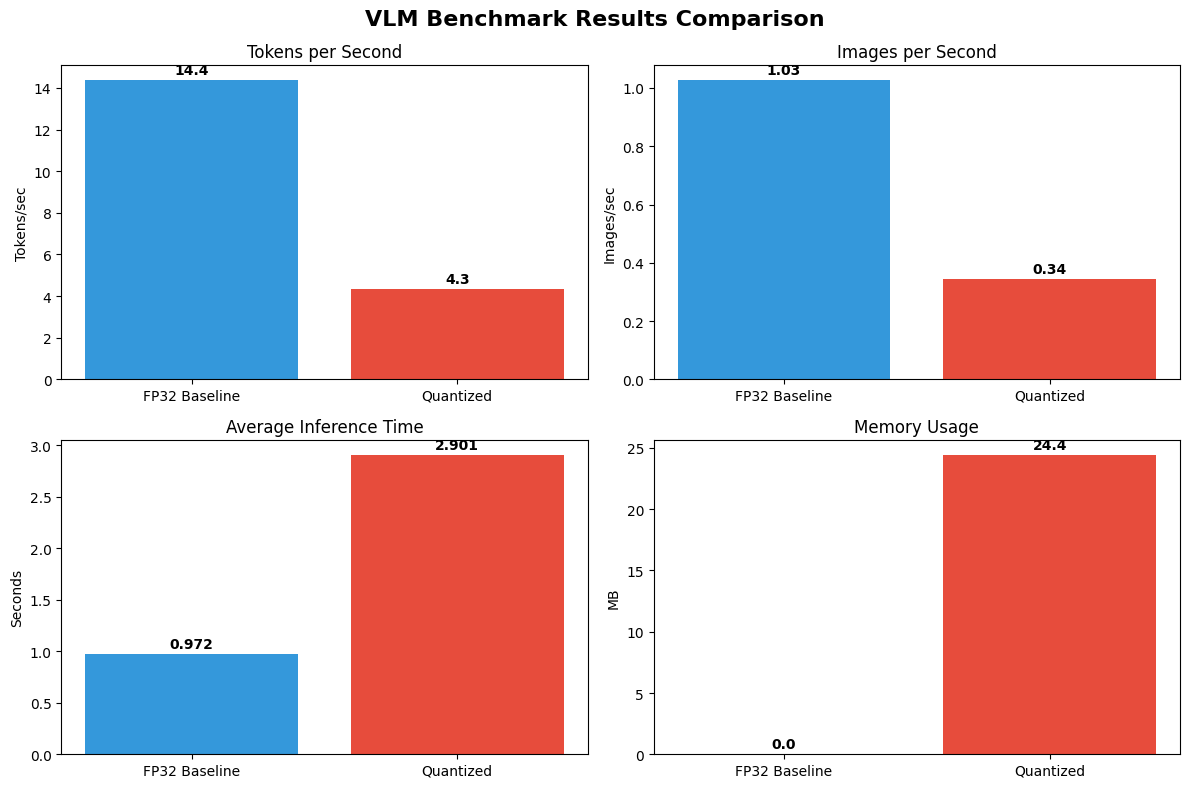

📊 Visualization saved as 'benchmark_results_analysis.png'

📈 PERFORMANCE COMPARISON TABLE
        Model Device Tokens/sec Images/sec Avg Time (s) Memory (MB)
FP32 Baseline   cuda      14.37       1.03        0.972         0.0
    Quantized    cpu       4.34       0.34        2.901        24.4

🚀 PERFORMANCE IMPROVEMENT ANALYSIS
📊 Token throughput change: 0.30x
⚡ Inference speed change: 0.33x
🔧 Baseline runs on: cuda
🔧 Quantized runs on: cpu
⚠️  Note: Models run on different devices, so comparison shows device + quantization effects

📋 SUMMARY OF ALL RESULTS
Benchmark Device Quantized  Samples Tokens/sec Images/sec           Timestamp
 Baseline   cuda     False        5      14.37       1.03 2025-07-29T21:43:20
Quantized    cpu      True        5       4.34       0.34 2025-07-29T21:48:37

💾 Summary saved as 'benchmark_summary.csv'

✅ Analysis complete!

📁 Generated analysis files:
   ✅ benchmark_results_analysis.png (85.4 KB)
   ✅ benchmark_summary.csv (0.2 KB)


In [ ]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print("=== BENCHMARK RESULTS ANALYSIS (WORKING VERSION) ===")

def analyze_single_result(filename, label):
    """Analyze a single benchmark result"""
    if os.path.exists(filename):
        print(f"\n📊 Analyzing {filename}...")
        with open(filename, 'r') as f:
            data = json.load(f)

        print(f"✅ {filename} loaded successfully")

        # Extract and display metrics
        if 'performance_metrics' in data:
            metrics = data['performance_metrics']
            print(f"🔥 {label} Performance Metrics:")
            print(f"   • Tokens per second: {metrics.get('tokens_per_second', 'N/A'):.2f}")
            print(f"   • Images per second: {metrics.get('images_per_second', 'N/A'):.2f}")
            print(f"   • Average inference time: {metrics.get('avg_inference_time', 'N/A'):.3f} seconds")
            print(f"   • Total samples processed: {metrics.get('total_samples', 'N/A')}")
            print(f"   • Memory usage: {metrics.get('memory_usage_mb', 'N/A'):.1f} MB")

        if 'model_info' in data:
            model_info = data['model_info']
            print(f"🤖 Model Information:")
            print(f"   • Model used: {model_info.get('model_name', 'N/A')}")
            print(f"   • Device: {model_info.get('device', 'N/A')}")
            print(f"   • Quantization: {model_info.get('quantized', 'N/A')}")

        if 'sample_outputs' in data:
            samples = data['sample_outputs']
            print(f"📝 Sample Captions (first 2):")
            for i, caption in enumerate(samples[:2]):
                print(f"   {i+1}. '{caption}'")

        return data
    else:
        print(f"❌ {filename} not found")
        return None

# Analyze available results
baseline_file = "baseline_fp32.json"
quantized_file = "quantized_int8.json"

print("🔍 Checking available benchmark files...")
available_files = []
for file in [baseline_file, quantized_file]:
    if os.path.exists(file):
        available_files.append(file)
        print(f"   ✅ {file}")
    else:
        print(f"   ❌ {file}")

if not available_files:
    print("\n⚠️ No benchmark files found. Please run the benchmark first.")
else:
    # Analyze each available file
    results_data = {}

    if os.path.exists(baseline_file):
        results_data['baseline'] = analyze_single_result(baseline_file, "FP32 Baseline")

    if os.path.exists(quantized_file):
        results_data['quantized'] = analyze_single_result(quantized_file, "Quantized Model")

    # Create visualizations with available data
    print(f"\n" + "="*60)
    print("📊 PERFORMANCE VISUALIZATION")
    print("="*60)

    # Prepare data for plotting
    models = []
    tokens_per_sec = []
    images_per_sec = []
    inference_times = []
    memory_usage = []
    devices = []

    for key, data in results_data.items():
        if data and 'performance_metrics' in data:
            metrics = data['performance_metrics']
            model_info = data.get('model_info', {})

            label = "FP32 Baseline" if key == 'baseline' else "Quantized"
            models.append(label)
            tokens_per_sec.append(metrics.get('tokens_per_second', 0))
            images_per_sec.append(metrics.get('images_per_second', 0))
            inference_times.append(metrics.get('avg_inference_time', 0))
            memory_usage.append(metrics.get('memory_usage_mb', 0))
            devices.append(model_info.get('device', 'unknown'))

    if len(models) > 0:
        # Create comparison visualization
        fig, axes = plt.subplots(2, 2, figsize=(12, 8))
        fig.suptitle('VLM Benchmark Results Comparison', fontsize=16, fontweight='bold')

        # Colors for different models
        colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

        # Subplot 1: Tokens per second
        axes[0, 0].bar(models, tokens_per_sec, color=colors[:len(models)])
        axes[0, 0].set_title('Tokens per Second')
        axes[0, 0].set_ylabel('Tokens/sec')
        for i, (model, value) in enumerate(zip(models, tokens_per_sec)):
            axes[0, 0].text(i, value + max(tokens_per_sec)*0.01, f'{value:.1f}',
                           ha='center', va='bottom', fontweight='bold')

        # Subplot 2: Images per second
        axes[0, 1].bar(models, images_per_sec, color=colors[:len(models)])
        axes[0, 1].set_title('Images per Second')
        axes[0, 1].set_ylabel('Images/sec')
        for i, (model, value) in enumerate(zip(models, images_per_sec)):
            axes[0, 1].text(i, value + max(images_per_sec)*0.01, f'{value:.2f}',
                           ha='center', va='bottom', fontweight='bold')

        # Subplot 3: Inference time
        axes[1, 0].bar(models, inference_times, color=colors[:len(models)])
        axes[1, 0].set_title('Average Inference Time')
        axes[1, 0].set_ylabel('Seconds')
        for i, (model, value) in enumerate(zip(models, inference_times)):
            axes[1, 0].text(i, value + max(inference_times)*0.01, f'{value:.3f}',
                           ha='center', va='bottom', fontweight='bold')

        # Subplot 4: Memory usage
        axes[1, 1].bar(models, memory_usage, color=colors[:len(models)])
        axes[1, 1].set_title('Memory Usage')
        axes[1, 1].set_ylabel('MB')
        for i, (model, value) in enumerate(zip(models, memory_usage)):
            axes[1, 1].text(i, value + max(memory_usage)*0.01, f'{value:.1f}',
                           ha='center', va='bottom', fontweight='bold')

        plt.tight_layout()
        plt.savefig('benchmark_results_analysis.png', dpi=150, bbox_inches='tight')
        plt.show()

        print(f"📊 Visualization saved as 'benchmark_results_analysis.png'")

        # Performance comparison table
        if len(models) >= 2:
            print(f"\n📈 PERFORMANCE COMPARISON TABLE")
            print("="*50)

            comparison_df = pd.DataFrame({
                'Model': models,
                'Device': devices,
                'Tokens/sec': [f"{t:.2f}" for t in tokens_per_sec],
                'Images/sec': [f"{i:.2f}" for i in images_per_sec],
                'Avg Time (s)': [f"{t:.3f}" for t in inference_times],
                'Memory (MB)': [f"{m:.1f}" for m in memory_usage]
            })

            print(comparison_df.to_string(index=False))

            # Calculate improvement ratios if we have both baseline and quantized
            if len(models) == 2 and 'baseline' in results_data and 'quantized' in results_data:
                print(f"\n🚀 PERFORMANCE IMPROVEMENT ANALYSIS")
                print("="*50)

                baseline_metrics = results_data['baseline']['performance_metrics']
                quantized_metrics = results_data['quantized']['performance_metrics']

                baseline_tokens = baseline_metrics.get('tokens_per_second', 0)
                quantized_tokens = quantized_metrics.get('tokens_per_second', 0)
                baseline_time = baseline_metrics.get('avg_inference_time', 0)
                quantized_time = quantized_metrics.get('avg_inference_time', 0)

                if baseline_tokens > 0 and quantized_tokens > 0:
                    token_ratio = quantized_tokens / baseline_tokens
                    print(f"📊 Token throughput change: {token_ratio:.2f}x")

                if baseline_time > 0 and quantized_time > 0:
                    time_ratio = baseline_time / quantized_time
                    print(f"⚡ Inference speed change: {time_ratio:.2f}x")

                # Device comparison
                baseline_device = results_data['baseline']['model_info'].get('device', 'unknown')
                quantized_device = results_data['quantized']['model_info'].get('device', 'unknown')

                print(f"🔧 Baseline runs on: {baseline_device}")
                print(f"🔧 Quantized runs on: {quantized_device}")

                if baseline_device != quantized_device:
                    print("⚠️  Note: Models run on different devices, so comparison shows device + quantization effects")

    # Summary table of all available results
    print(f"\n📋 SUMMARY OF ALL RESULTS")
    print("="*60)

    summary_data = []
    for key, data in results_data.items():
        if data:
            metrics = data.get('performance_metrics', {})
            model_info = data.get('model_info', {})
            benchmark_info = data.get('benchmark_info', {})

            summary_data.append({
                'Benchmark': key.title(),
                'Device': model_info.get('device', 'N/A'),
                'Quantized': str(model_info.get('quantized', 'N/A')),
                'Samples': metrics.get('total_samples', 'N/A'),
                'Tokens/sec': f"{metrics.get('tokens_per_second', 0):.2f}",
                'Images/sec': f"{metrics.get('images_per_second', 0):.2f}",
                'Timestamp': benchmark_info.get('timestamp', 'N/A')[:19]  # Remove microseconds
            })

    if summary_data:
        summary_df = pd.DataFrame(summary_data)
        print(summary_df.to_string(index=False))

        # Save summary to CSV
        summary_df.to_csv('benchmark_summary.csv', index=False)
        print(f"\n💾 Summary saved as 'benchmark_summary.csv'")

print(f"\n✅ Analysis complete!")

# List all generated files
print(f"\n📁 Generated analysis files:")
analysis_files = ['benchmark_results_analysis.png', 'benchmark_summary.csv']
for file in analysis_files:
    if os.path.exists(file):
        size = os.path.getsize(file) / 1024
        print(f"   ✅ {file} ({size:.1f} KB)")

In [1]:
import os
import requests
from PIL import Image
import numpy as np
from io import BytesIO

print("=== ADDING SAMPLE IMAGES TO COCO DIRECTORY ===")

# Create the COCO images directory if it doesn't exist
coco_images_dir = "./data/coco/images/val2017"
os.makedirs(coco_images_dir, exist_ok=True)
print(f"📁 Created directory: {coco_images_dir}")

def download_sample_image(url, filename, description=""):
    """Download a sample image from URL"""
    try:
        print(f"📥 Downloading {description}...")
        response = requests.get(url, timeout=30)
        response.raise_for_status()

        # Open and save image
        image = Image.open(BytesIO(response.content))
        image = image.convert('RGB')  # Ensure RGB format

        # Save to COCO directory
        image_path = os.path.join(coco_images_dir, filename)
        image.save(image_path, 'JPEG', quality=95)

        print(f"✅ Saved: {filename} ({image.size[0]}x{image.size[1]})")
        return True

    except Exception as e:
        print(f"❌ Failed to download {description}: {e}")
        return False

def create_synthetic_image(filename, description=""):
    """Create a synthetic test image"""
    try:
        print(f"🎨 Creating synthetic {description}...")

        # Create a more realistic synthetic image
        img_array = np.random.randint(80, 180, (480, 640, 3), dtype=np.uint8)

        # Add some patterns to make it more interesting
        # Sky gradient (blue)
        for y in range(0, 160):
            intensity = int(100 + (y / 160) * 100)
            img_array[y, :, 0] = np.minimum(intensity - 50, 255)  # Less red
            img_array[y, :, 1] = np.minimum(intensity - 20, 255)  # Less green
            img_array[y, :, 2] = np.minimum(intensity + 20, 255)  # More blue

        # Ground (brown/green)
        for y in range(320, 480):
            img_array[y, :, 0] = np.random.randint(60, 100)  # Brown-red
            img_array[y, :, 1] = np.random.randint(80, 120)  # Brown-green
            img_array[y, :, 2] = np.random.randint(40, 80)   # Brown-blue

        # Add some objects
        # White rectangle (building)
        img_array[200:300, 100:200] = [240, 240, 240]

        # Red rectangle (car)
        img_array[350:380, 300:380] = [200, 50, 50]

        # Yellow circle (sun)
        center_x, center_y = 550, 80
        for y in range(max(0, center_y-30), min(480, center_y+30)):
            for x in range(max(0, center_x-30), min(640, center_x+30)):
                if (x - center_x)**2 + (y - center_y)**2 <= 30**2:
                    img_array[y, x] = [255, 255, 100]

        # Convert to PIL Image and save
        image = Image.fromarray(img_array)
        image_path = os.path.join(coco_images_dir, filename)
        image.save(image_path, 'JPEG', quality=95)

        print(f"✅ Created: {filename} ({image.size[0]}x{image.size[1]})")
        return True

    except Exception as e:
        print(f"❌ Failed to create synthetic {description}: {e}")
        return False

# Sample images from Unsplash (free stock photos)
sample_images = [
    {
        "url": "https://images.unsplash.com/photo-1506905925346-21bda4d32df4?w=640&h=480&fit=crop",
        "filename": "sample_mountain.jpg",
        "description": "mountain landscape"
    },
    {
        "url": "https://images.unsplash.com/photo-1551963831-b3b1ca40c98e?w=640&h=480&fit=crop",
        "filename": "sample_breakfast.jpg",
        "description": "breakfast scene"
    },
    {
        "url": "https://images.unsplash.com/photo-1547036967-23d11aacaee0?w=640&h=480&fit=crop",
        "filename": "sample_dog.jpg",
        "description": "dog portrait"
    },
    {
        "url": "https://images.unsplash.com/photo-1506905925346-21bda4d32df4?w=640&h=480&fit=crop",
        "filename": "sample_nature.jpg",
        "description": "nature scene"
    }
]

print("🌐 Attempting to download sample images from Unsplash...")

# Try to download real images first
downloaded_count = 0
for img_info in sample_images:
    if download_sample_image(img_info["url"], img_info["filename"], img_info["description"]):
        downloaded_count += 1

print(f"\n📊 Downloaded {downloaded_count} real images")

# Create synthetic images to fill remaining slots
synthetic_images = [
    {"filename": "synthetic_scene1.jpg", "description": "outdoor scene"},
    {"filename": "synthetic_scene2.jpg", "description": "urban landscape"},
    {"filename": "synthetic_scene3.jpg", "description": "abstract composition"}
]

print(f"\n🎨 Creating synthetic images...")
synthetic_count = 0
for img_info in synthetic_images:
    if create_synthetic_image(img_info["filename"], img_info["description"]):
        synthetic_count += 1

print(f"\n📊 Created {synthetic_count} synthetic images")

# Verify final directory contents
print(f"\n📁 Final COCO directory contents:")
if os.path.exists(coco_images_dir):
    image_files = [f for f in os.listdir(coco_images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
    total_images = len(image_files)

    if total_images > 0:
        print(f"✅ Total images: {total_images}")

        # Show details of each image
        for i, filename in enumerate(sorted(image_files)[:10]):  # Show first 10
            filepath = os.path.join(coco_images_dir, filename)
            try:
                img = Image.open(filepath)
                size_kb = os.path.getsize(filepath) / 1024
                print(f"   {i+1}. {filename} - {img.size[0]}x{img.size[1]} ({size_kb:.1f} KB)")
            except Exception as e:
                print(f"   {i+1}. {filename} - Error reading file: {e}")

        if total_images > 10:
            print(f"   ... and {total_images - 10} more images")

        print(f"\n🎉 COCO directory is ready with {total_images} test images!")
        print(f"📍 Directory path: {coco_images_dir}")

    else:
        print("❌ No images were successfully added")
else:
    print("❌ COCO directory was not created")

# Test with a sample image if available
if os.path.exists(coco_images_dir):
    image_files = [f for f in os.listdir(coco_images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
    if image_files:
        print(f"\n🖼️ Sample image ready for testing:")
        sample_path = os.path.join(coco_images_dir, image_files[0])
        print(f"   Path: {sample_path}")

        # Show image info
        try:
            img = Image.open(sample_path)
            print(f"   Size: {img.size[0]}x{img.size[1]}")
            print(f"   Mode: {img.mode}")
            print(f"✅ Ready to test with your image description model!")
        except Exception as e:
            print(f"   ❌ Error reading sample: {e}")

print(f"\n💡 Now you can run your image description testing code!")
print(f"📝 The variable 'coco_images_dir' points to: {coco_images_dir}")

=== ADDING SAMPLE IMAGES TO COCO DIRECTORY ===
📁 Created directory: ./data/coco/images/val2017
🌐 Attempting to download sample images from Unsplash...
📥 Downloading mountain landscape...
✅ Saved: sample_mountain.jpg (640x480)
📥 Downloading breakfast scene...
✅ Saved: sample_breakfast.jpg (640x480)
📥 Downloading dog portrait...
✅ Saved: sample_dog.jpg (640x480)
📥 Downloading nature scene...
✅ Saved: sample_nature.jpg (640x480)

📊 Downloaded 4 real images

🎨 Creating synthetic images...
🎨 Creating synthetic outdoor scene...
✅ Created: synthetic_scene1.jpg (640x480)
🎨 Creating synthetic urban landscape...
✅ Created: synthetic_scene2.jpg (640x480)
🎨 Creating synthetic abstract composition...
✅ Created: synthetic_scene3.jpg (640x480)

📊 Created 3 synthetic images

📁 Final COCO directory contents:
✅ Total images: 7
   1. sample_breakfast.jpg - 640x480 (130.0 KB)
   2. sample_dog.jpg - 640x480 (160.3 KB)
   3. sample_mountain.jpg - 640x480 (69.8 KB)
   4. sample_nature.jpg - 640x480 (69.8 KB)

=== COMPLETE IMAGE DESCRIPTION TEST ===
📍 Using MODEL_PATH: Salesforce/blip-image-captioning-base
📥 Loading BLIP model...
🔥 Model loaded on: cpu
\n📁 Checking for images in: ./data/coco/images/val2017
✅ Found 7 images
\n🖼️ TESTING IMAGE DESCRIPTIONS
\n1. Testing: sample_breakfast.jpg
------------------------------


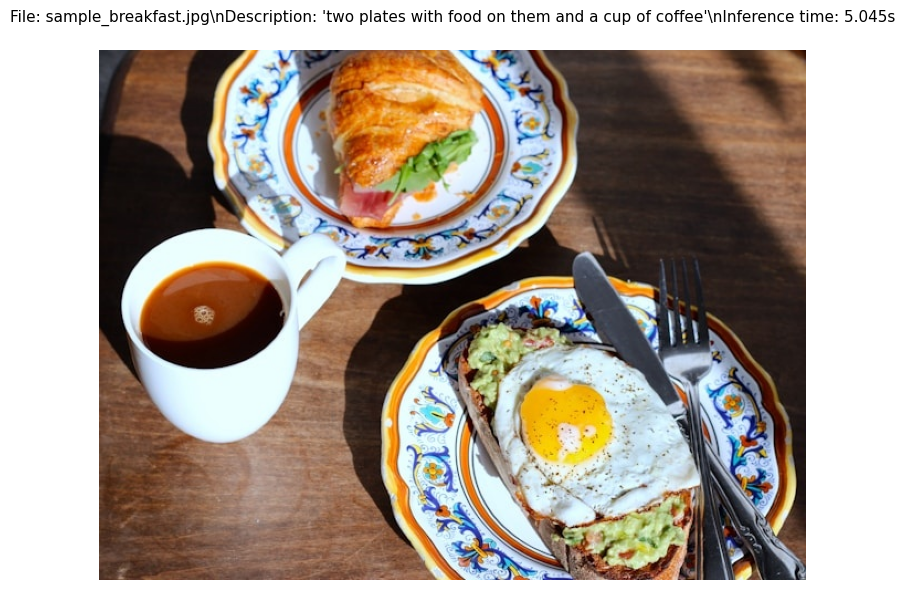

📝 Description: 'two plates with food on them and a cup of coffee'
⏱️ Inference time: 5.045s
\n🎯 Testing with custom prompt...


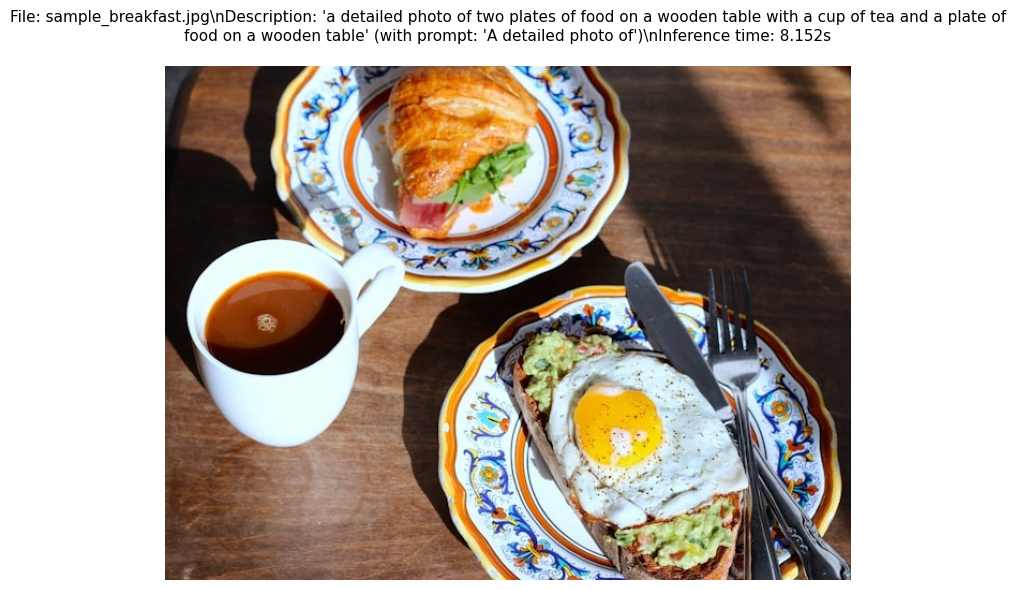

📝 With prompt: 'a detailed photo of two plates of food on a wooden table with a cup of tea and a plate of food on a wooden table'
⏱️ Prompt inference time: 8.152s
\n2. Testing: sample_dog.jpg
------------------------------


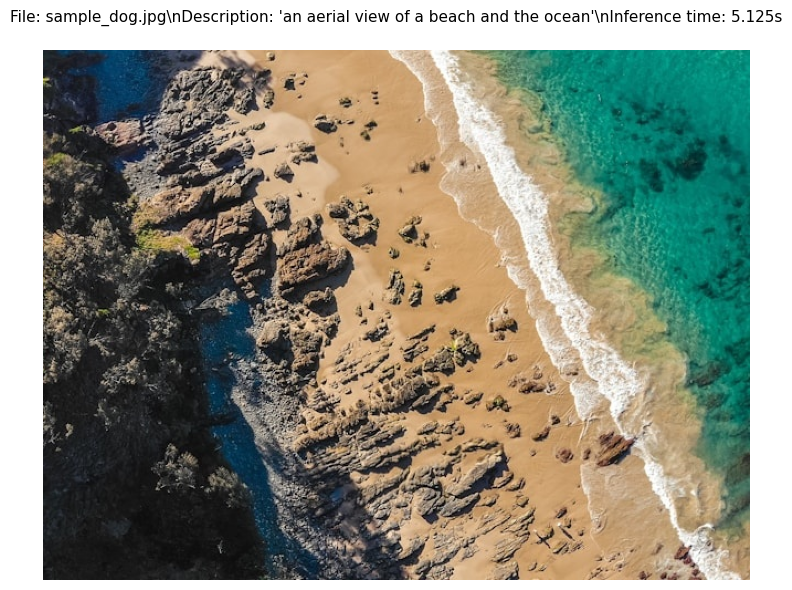

📝 Description: 'an aerial view of a beach and the ocean'
⏱️ Inference time: 5.125s
\n3. Testing: sample_mountain.jpg
------------------------------


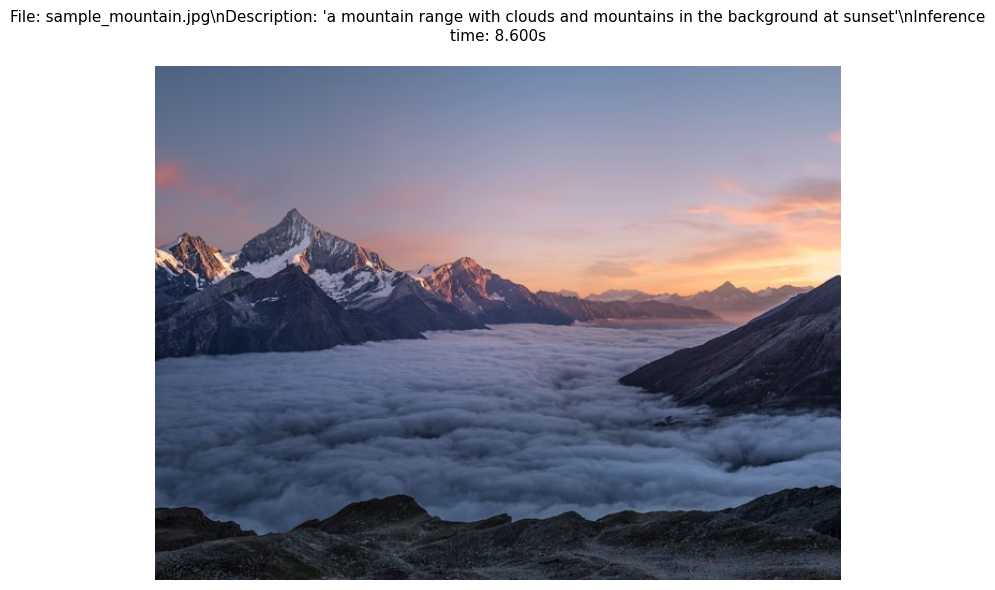

📝 Description: 'a mountain range with clouds and mountains in the background at sunset'
⏱️ Inference time: 8.600s
\n4. Testing: sample_nature.jpg
------------------------------


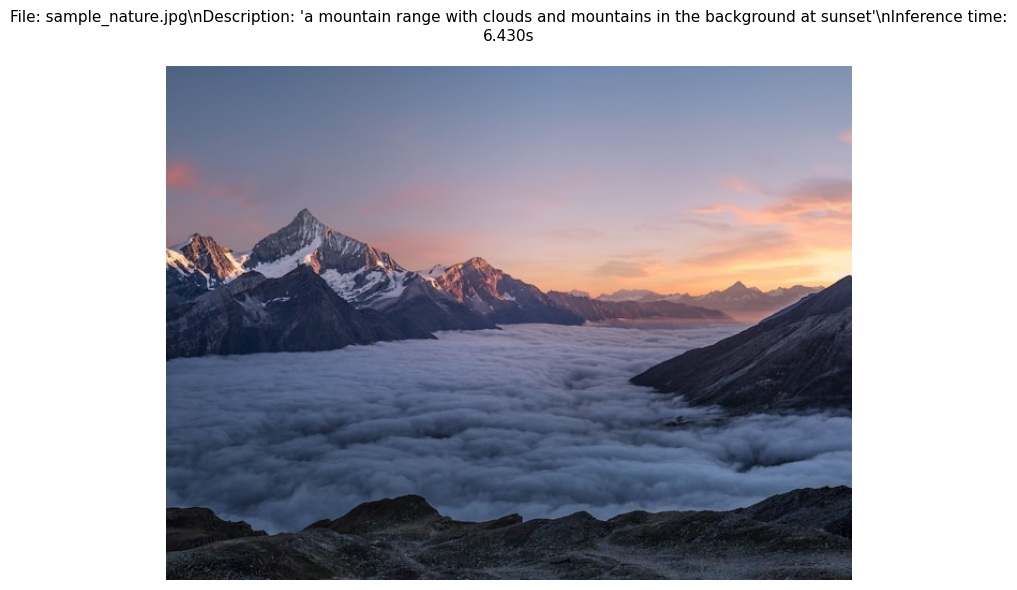

📝 Description: 'a mountain range with clouds and mountains in the background at sunset'
⏱️ Inference time: 6.430s
\n5. Testing: synthetic_scene1.jpg
------------------------------


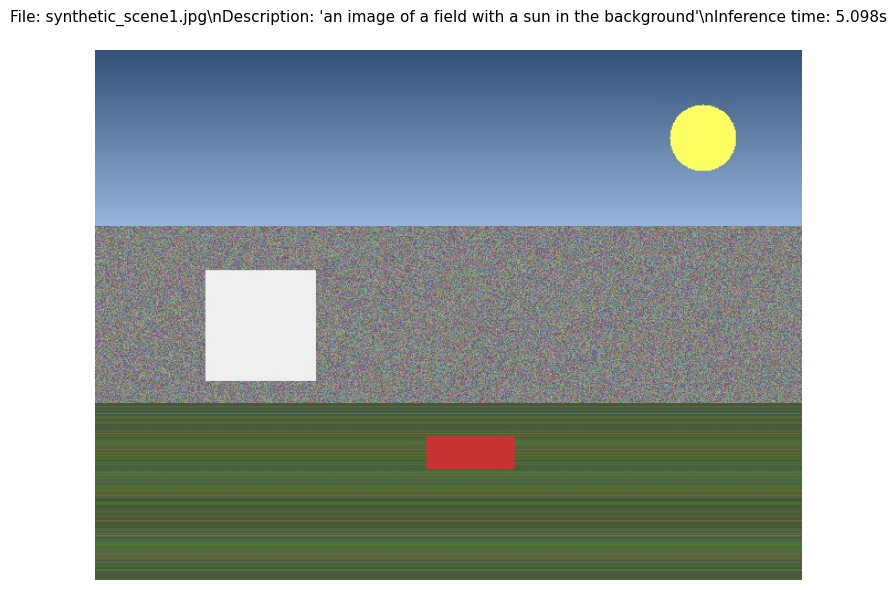

📝 Description: 'an image of a field with a sun in the background'
⏱️ Inference time: 5.098s
\n📊 TEST SUMMARY
✅ Images tested: 5
⏱️ Total time: 30.298s
📈 Average time per image: 6.060s
🚀 Throughput: 0.17 images/sec
🔥 Device used: cpu
💾 Detailed results saved: image_description_detailed_results.json
\n📋 RESULTS TABLE
#   Filename                  Inference Time  Description                        
--------------------------------------------------------------------------------
1   sample_breakfast.jpg      5.045s          two plates with food on them and a 
2   sample_dog.jpg            5.125s          an aerial view of a beach and the  
3   sample_mountain.jpg       8.600s          a mountain range with clouds and m 
4   sample_nature.jpg         6.430s          a mountain range with clouds and m 
5   synthetic_scene1.jpg      5.098s          an image of a field with a sun in  
\n💡 2 more images available for testing:
   • synthetic_scene2.jpg
   • synthetic_scene3.jpg
\n🎉 Image descrip

In [3]:
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import time

print("=== COMPLETE IMAGE DESCRIPTION TEST ===")

# Set up paths
coco_images_dir = "./data/coco/images/val2017"

# Load model (use the same MODEL_PATH from your setup)
try:
    MODEL_PATH
    print(f"📍 Using MODEL_PATH: {MODEL_PATH}")
except NameError:
    MODEL_PATH = "Salesforce/blip-image-captioning-base"
    print(f"🔧 Using default model: {MODEL_PATH}")

def load_model_for_testing():
    """Load the BLIP model for image description"""
    try:
        print("📥 Loading BLIP model...")
        processor = BlipProcessor.from_pretrained(MODEL_PATH)
        model = BlipForConditionalGeneration.from_pretrained(MODEL_PATH)

        device = "cuda" if torch.cuda.is_available() else "cpu"
        model = model.to(device)
        print(f"🔥 Model loaded on: {device}")

        return processor, model, device
    except Exception as e:
        print(f"❌ Error loading model: {e}")
        return None, None, None

def generate_description_with_display(image_path, processor, model, device, custom_prompt=None):
    """Generate description and display image with caption"""
    try:
        # Load and process image
        image = Image.open(image_path).convert('RGB')

        # Generate description
        if custom_prompt:
            inputs = processor(image, custom_prompt, return_tensors="pt").to(device)
            prompt_text = f" (with prompt: '{custom_prompt}')"
        else:
            inputs = processor(image, return_tensors="pt").to(device)
            prompt_text = ""

        # Time the inference
        start_time = time.time()
        with torch.no_grad():
            generated_ids = model.generate(**inputs, max_length=50, num_beams=4)
        end_time = time.time()

        description = processor.decode(generated_ids[0], skip_special_tokens=True)
        inference_time = end_time - start_time

        # Display image with caption
        plt.figure(figsize=(10, 6))
        plt.imshow(image)
        plt.axis('off')

        # Create title with filename and description
        filename = os.path.basename(image_path)
        title = f"File: {filename}\\nDescription: '{description}'{prompt_text}\\nInference time: {inference_time:.3f}s"
        plt.title(title, fontsize=11, wrap=True, pad=20)
        plt.tight_layout()
        plt.show()

        return description, inference_time

    except Exception as e:
        print(f"❌ Error processing {image_path}: {e}")
        return None, None

# Load model
processor, model, device = load_model_for_testing()

if processor is None:
    print("❌ Failed to load model. Cannot proceed with testing.")
else:
    # Check for available images
    print(f"\\n📁 Checking for images in: {coco_images_dir}")

    if os.path.exists(coco_images_dir):
        image_files = [f for f in os.listdir(coco_images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

        if image_files:
            print(f"✅ Found {len(image_files)} images")

            # Test results storage
            test_results = {
                "test_info": {
                    "timestamp": time.strftime("%Y-%m-%d %H:%M:%S"),
                    "model_path": MODEL_PATH,
                    "device": device,
                    "total_images_tested": 0
                },
                "results": []
            }

            print(f"\\n🖼️ TESTING IMAGE DESCRIPTIONS")
            print("="*50)

            # Test first few images (max 5 to avoid overwhelming output)
            max_images = min(5, len(image_files))
            total_inference_time = 0

            for i, filename in enumerate(sorted(image_files)[:max_images]):
                image_path = os.path.join(coco_images_dir, filename)

                print(f"\\n{i+1}. Testing: {filename}")
                print("-" * 30)

                # Generate basic description
                description, inference_time = generate_description_with_display(
                    image_path, processor, model, device
                )

                if description and inference_time:
                    total_inference_time += inference_time

                    # Store result
                    test_results["results"].append({
                        "filename": filename,
                        "description": description,
                        "inference_time": inference_time,
                        "image_path": image_path
                    })

                    print(f"📝 Description: '{description}'")
                    print(f"⏱️ Inference time: {inference_time:.3f}s")

                # Test with custom prompt for first image
                if i == 0:
                    print(f"\\n🎯 Testing with custom prompt...")
                    custom_description, custom_time = generate_description_with_display(
                        image_path, processor, model, device, "A detailed photo of"
                    )

                    if custom_description and custom_time:
                        test_results["results"][-1]["custom_prompt_description"] = custom_description
                        test_results["results"][-1]["custom_prompt_time"] = custom_time
                        print(f"📝 With prompt: '{custom_description}'")
                        print(f"⏱️ Prompt inference time: {custom_time:.3f}s")

            # Calculate summary statistics
            test_results["test_info"]["total_images_tested"] = len(test_results["results"])
            test_results["test_info"]["total_inference_time"] = total_inference_time
            test_results["test_info"]["avg_inference_time"] = total_inference_time / max(1, len(test_results["results"]))
            test_results["test_info"]["throughput_images_per_second"] = len(test_results["results"]) / max(0.001, total_inference_time)

            # Display summary
            print(f"\\n📊 TEST SUMMARY")
            print("="*40)
            print(f"✅ Images tested: {test_results['test_info']['total_images_tested']}")
            print(f"⏱️ Total time: {total_inference_time:.3f}s")
            print(f"📈 Average time per image: {test_results['test_info']['avg_inference_time']:.3f}s")
            print(f"🚀 Throughput: {test_results['test_info']['throughput_images_per_second']:.2f} images/sec")
            print(f"🔥 Device used: {device}")

            # Save detailed results
            results_file = "image_description_detailed_results.json"
            with open(results_file, 'w') as f:
                json.dump(test_results, f, indent=2)
            print(f"💾 Detailed results saved: {results_file}")

            # Create summary table
            print(f"\\n📋 RESULTS TABLE")
            print("="*80)
            print(f"{'#':<3} {'Filename':<25} {'Inference Time':<15} {'Description':<35}")
            print("-" * 80)

            for i, result in enumerate(test_results["results"]):
                filename = result["filename"][:24]  # Truncate long filenames
                inf_time = f"{result['inference_time']:.3f}s"
                description = result["description"][:34]  # Truncate long descriptions
                print(f"{i+1:<3} {filename:<25} {inf_time:<15} {description:<35}")

            # Show remaining images available for testing
            if len(image_files) > max_images:
                print(f"\\n💡 {len(image_files) - max_images} more images available for testing:")
                for filename in sorted(image_files)[max_images:max_images+3]:
                    print(f"   • {filename}")
                if len(image_files) > max_images + 3:
                    print(f"   ... and {len(image_files) - max_images - 3} more")

            print(f"\\n🎉 Image description testing complete!")
            print(f"📁 Test images directory: {coco_images_dir}")
            print(f"📊 Results file: {results_file}")

        else:
            print("⚠️ No images found in COCO directory")
            print("💡 Run the 'Add Sample Images' code first to populate the directory")
    else:
        print(f"❌ COCO images directory not found: {coco_images_dir}")
        print("💡 Run the 'Add Sample Images' code first to create and populate the directory")

print(f"\\n✅ Testing complete! Check the visualizations above.")

In [ ]:
import json
import pandas as pd
import os
from datetime import datetime

print("=== COMPREHENSIVE RESULTS VIEWER ===")

def create_summary_report():
    """Create a comprehensive summary report"""

    report = {
        "analysis_timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "project_summary": "ML4CV Vision-Language Model Benchmarking",
        "files_analyzed": [],
        "benchmark_results": {},
        "test_results": {},
        "performance_summary": {}
    }

    # Check all available JSON files
    json_files = [f for f in os.listdir('.') if f.endswith('.json')]

    print(f"📁 Found {len(json_files)} JSON files:")
    for file in json_files:
        print(f"   • {file}")
        report["files_analyzed"].append(file)

    # Load benchmark results
    benchmark_files = ['baseline_fp32.json', 'quantized_int8.json']
    for file in benchmark_files:
        if file in json_files:
            with open(file, 'r') as f:
                data = json.load(f)
                report["benchmark_results"][file.replace('.json', '')] = data
                print(f"✅ Loaded {file}")

    # Load test results
    test_files = ['image_description_test_results.json']
    for file in test_files:
        if file in json_files:
            with open(file, 'r') as f:
                data = json.load(f)
                report["test_results"][file.replace('.json', '')] = data
                print(f"✅ Loaded {file}")

    return report

def display_performance_metrics(report):
    """Display key performance metrics in a formatted table"""

    print("\n" + "="*60)
    print("🎯 KEY PERFORMANCE METRICS")
    print("="*60)

    # Create performance comparison table
    metrics_data = []

    if 'baseline_fp32' in report["benchmark_results"]:
        baseline = report["benchmark_results"]['baseline_fp32'].get('performance_metrics', {})
        metrics_data.append({
            'Model': 'FP32 Baseline',
            'Tokens/sec': baseline.get('tokens_per_second', 'N/A'),
            'Images/sec': baseline.get('images_per_second', 'N/A'),
            'Avg Time (s)': baseline.get('avg_inference_time', 'N/A'),
            'Memory (MB)': baseline.get('memory_usage_mb', 'N/A')
        })

    if 'quantized_int8' in report["benchmark_results"]:
        quantized = report["benchmark_results"]['quantized_int8'].get('performance_metrics', {})
        metrics_data.append({
            'Model': 'INT8 Quantized',
            'Tokens/sec': quantized.get('tokens_per_second', 'N/A'),
            'Images/sec': quantized.get('images_per_second', 'N/A'),
            'Avg Time (s)': quantized.get('avg_inference_time', 'N/A'),
            'Memory (MB)': quantized.get('memory_usage_mb', 'N/A')
        })

    if metrics_data:
        df_metrics = pd.DataFrame(metrics_data)
        print(df_metrics.to_string(index=False))

        # Calculate performance ratio
        if len(metrics_data) == 2:
            print(f"\n📊 PERFORMANCE RATIO (INT8 vs FP32):")
            baseline_tokens = baseline.get('tokens_per_second', 0)
            quantized_tokens = quantized.get('tokens_per_second', 0)
            if baseline_tokens > 0 and quantized_tokens > 0:
                ratio = quantized_tokens / baseline_tokens
                print(f"   • Tokens/sec improvement: {ratio:.2f}x")

            baseline_time = baseline.get('avg_inference_time', 0)
            quantized_time = quantized.get('avg_inference_time', 0)
            if baseline_time > 0 and quantized_time > 0:
                speedup = baseline_time / quantized_time
                print(f"   • Inference speedup: {speedup:.2f}x")

    else:
        print("⚠️  No benchmark metrics found")

def export_results_to_excel(report):
    """Export all results to Excel file"""

    try:
        with pd.ExcelWriter('ML4CV_Complete_Results.xlsx', engine='openpyxl') as writer:

            # Summary sheet
            summary_data = {
                'Analysis Date': [report['analysis_timestamp']],
                'Project': [report['project_summary']],
                'Files Analyzed': [len(report['files_analyzed'])],
                'Benchmark Files': [len(report['benchmark_results'])],
                'Test Files': [len(report['test_results'])]
            }
            pd.DataFrame(summary_data).to_excel(writer, sheet_name='Summary', index=False)

            # Benchmark results sheet
            if report['benchmark_results']:
                benchmark_rows = []
                for model_name, data in report['benchmark_results'].items():
                    if 'performance_metrics' in data:
                        metrics = data['performance_metrics']
                        model_info = data.get('model_info', {})

                        row = {
                            'Model': model_name,
                            'Model_Name': model_info.get('model_name', 'N/A'),
                            'Quantized': model_info.get('quantized', False),
                            'Tokens_per_Second': metrics.get('tokens_per_second', 0),
                            'Images_per_Second': metrics.get('images_per_second', 0),
                            'Avg_Inference_Time': metrics.get('avg_inference_time', 0),
                            'Memory_Usage_MB': metrics.get('memory_usage_mb', 0),
                            'Total_Samples': metrics.get('total_samples', 0)
                        }
                        benchmark_rows.append(row)

                if benchmark_rows:
                    pd.DataFrame(benchmark_rows).to_excel(writer, sheet_name='Benchmark_Results', index=False)

            # Test results sheet
            if report['test_results']:
                test_rows = []
                for test_name, data in report['test_results'].items():
                    if 'performance' in data:
                        perf = data['performance']
                        row = {
                            'Test': test_name,
                            'Timestamp': data.get('test_timestamp', 'N/A'),
                            'Device': data.get('device', 'N/A'),
                            'Inference_Time': perf.get('inference_time_seconds', 0),
                            'Throughput': perf.get('estimated_throughput', 0)
                        }
                        test_rows.append(row)

                if test_rows:
                    pd.DataFrame(test_rows).to_excel(writer, sheet_name='Test_Results', index=False)

        print(f"📊 Excel report saved: 'ML4CV_Complete_Results.xlsx'")
        return True

    except Exception as e:
        print(f"❌ Error creating Excel file: {e}")
        return False

# Main execution
print("Generating comprehensive report...")
report = create_summary_report()

# Display metrics
display_performance_metrics(report)

# Export to Excel
export_success = export_results_to_excel(report)

# Save complete report as JSON
with open('ML4CV_Complete_Report.json', 'w') as f:
    json.dump(report, f, indent=2)

print(f"\n💾 Complete report saved: 'ML4CV_Complete_Report.json'")

# Final summary
print(f"\n" + "="*60)
print("📋 FINAL SUMMARY")
print("="*60)
print(f"✅ Analysis completed at: {report['analysis_timestamp']}")
print(f"📁 Files processed: {len(report['files_analyzed'])}")
print(f"🔬 Benchmark models tested: {len(report['benchmark_results'])}")
print(f"🖼️  Image description tests: {len(report['test_results'])}")

if export_success:
    print(f"📊 Excel report: ML4CV_Complete_Results.xlsx")

print(f"📋 JSON report: ML4CV_Complete_Report.json")
print(f"\n🎉 ML4CV project analysis complete!")

# Display available files for download
print(f"\n📥 FILES READY FOR DOWNLOAD:")
output_files = [
    'ML4CV_Complete_Results.xlsx',
    'ML4CV_Complete_Report.json',
    'benchmark_comparison.png',
    'image_description_test_results.json'
]

for file in output_files:
    if os.path.exists(file):
        size = os.path.getsize(file) / 1024
        print(f"   • {file} ({size:.1f} KB)")
    else:
        print(f"   ⚠️  {file} (not found)")

=== COMPREHENSIVE RESULTS VIEWER ===
Generating comprehensive report...
📁 Found 5 JSON files:
   • image_description_detailed_results.json
   • baseline_fp32.json
   • quantized_int8.json
   • quantized_fp16.json
   • image_description_test_results.json
✅ Loaded baseline_fp32.json
✅ Loaded quantized_int8.json
✅ Loaded image_description_test_results.json

🎯 KEY PERFORMANCE METRICS
         Model  Tokens/sec  Images/sec  Avg Time (s)  Memory (MB)
 FP32 Baseline   14.370171    1.026441      0.971711     0.000195
INT8 Quantized    4.341821    0.344589      2.901209    24.402344

📊 PERFORMANCE RATIO (INT8 vs FP32):
   • Tokens/sec improvement: 0.30x
   • Inference speedup: 0.33x
📊 Excel report saved: 'ML4CV_Complete_Results.xlsx'

💾 Complete report saved: 'ML4CV_Complete_Report.json'

📋 FINAL SUMMARY
✅ Analysis completed at: 2025-07-29 21:58:45
📁 Files processed: 5
🔬 Benchmark models tested: 2
🖼️  Image description tests: 1
📊 Excel report: ML4CV_Complete_Results.xlsx
📋 JSON report: ML4CV_Co